# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# Define our parameters
list_city = []
list_lat = []
list_lng = []
list_temp = []
list_humidity = []
list_cloudiness = []
list_wind = []
list_cntry = []
list_date = []

counter = 0

# URL for our GET request
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q='

print('Begin retrieving data...')
print('-----------------------------')

for city in cities:
    try:
        response = requests.get(url + city).json()

        list_city.append(response['name'])
        list_lat.append(response['coord']['lat'])
        list_lng.append(response['coord']['lon'])
        list_temp.append(response['main']['temp_max'])
        list_humidity.append(response['main']['humidity'])
        list_cloudiness.append(response['clouds']['all'])
        list_wind.append(response['wind']['speed'])
        list_cntry.append(response['sys']['country'])
        list_date.append(response['dt'])
        
        print(f'Processing record {counter} for {city}')
        
    except:
        print('City not found. Skipping...')
        
    counter += 1

print('-----------------------------')
print('Data retrieval process done.')

Begin retrieving data...
-----------------------------
Processing record 0 for kapaa
Processing record 1 for nikolskoye
Processing record 2 for olinda
Processing record 3 for yurgamysh
Processing record 4 for nhulunbuy
Processing record 5 for cidreira
Processing record 6 for carnarvon
Processing record 7 for thompson
Processing record 8 for palmer
City not found. Skipping...
Processing record 10 for victoria
Processing record 11 for port elizabeth
Processing record 12 for kieta
Processing record 13 for talnakh
Processing record 14 for luderitz
Processing record 15 for provideniya
Processing record 16 for busselton
City not found. Skipping...
Processing record 18 for cape town
Processing record 19 for bodden town
City not found. Skipping...
City not found. Skipping...
Processing record 22 for rikitea
Processing record 23 for albany
Processing record 24 for coolum beach
Processing record 25 for khatanga
Processing record 26 for pevek
Processing record 27 for veraval
Processing record 28 

Processing record 236 for la ronge
Processing record 237 for paamiut
Processing record 238 for nome
Processing record 239 for kushiro
Processing record 240 for dongli
Processing record 241 for hasaki
Processing record 242 for hwange
Processing record 243 for puerto ayora
Processing record 244 for dhidhdhoo
Processing record 245 for bela
Processing record 246 for saint george
Processing record 247 for verkhnetulomskiy
Processing record 248 for srednekolymsk
Processing record 249 for sokoto
Processing record 250 for hermon
Processing record 251 for mahajanga
Processing record 252 for clyde river
Processing record 253 for labuhan
City not found. Skipping...
Processing record 255 for olivenza
Processing record 256 for ostrovnoy
Processing record 257 for tawang
Processing record 258 for bay city
Processing record 259 for pacifica
Processing record 260 for port hedland
Processing record 261 for brae
Processing record 262 for klyuchi
Processing record 263 for ancud
Processing record 264 for a

Processing record 474 for tahe
Processing record 475 for mirnyy
Processing record 476 for dabola
Processing record 477 for darhan
Processing record 478 for pisco
Processing record 479 for urengoy
Processing record 480 for nowy targ
Processing record 481 for rize
Processing record 482 for adrar
Processing record 483 for alto araguaia
Processing record 484 for lazaro cardenas
Processing record 485 for syamzha
Processing record 486 for rio grande
Processing record 487 for ngunguru
Processing record 488 for belmonte
Processing record 489 for tautira
Processing record 490 for graaff-reinet
Processing record 491 for dingle
Processing record 492 for kabanga
Processing record 493 for goleniow
Processing record 494 for artvin
Processing record 495 for necochea
Processing record 496 for baculin
Processing record 497 for san luis
Processing record 498 for cuzaplac
Processing record 499 for kampot
Processing record 500 for sao francisco do sul
Processing record 501 for thinadhoo
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
# Make a DataFrame with the data we retrieved
weather_data_df = pd.DataFrame({
    'City': list_city, 
    'Lat': list_lat, 
    'Lng': list_lng, 
    'Max Temp': list_temp, 
    'Humidity': list_humidity, 
    'Cloudiness': list_cloudiness, 
    'Wind Speed': list_wind, 
    'Country': list_cntry, 
    'Date': list_date
})

# Explort the city data into a CSV file
weather_data_df.to_csv(output_data_file, encoding='utf-8', index=False, header=True)

# Display the DataFrame
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,80.92,74,75,4.00,US,1632101408
1,Nikolskoye,59.7035,30.7861,40.89,82,100,8.75,RU,1632101443
2,Olinda,-8.0089,-34.8553,76.73,69,40,8.05,BR,1632101443
3,Yurgamysh,55.3714,64.4656,32.27,78,19,12.15,RU,1632101443
4,Nhulunbuy,-12.2333,136.7667,84.81,61,75,14.97,AU,1632101444


In [33]:
# Describe the DataFrame
weather_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,18.482312,18.129385,65.030922,70.388298,50.074468,8.041330,1.632102e+09
std,34.007215,92.477826,16.638931,20.306880,40.850959,5.982481,1.057670e+02
min,-54.800000,-179.166700,10.620000,6.000000,0.000000,0.000000,1.632101e+09
25%,-11.231625,-62.304025,52.990000,60.000000,5.000000,3.440000,1.632101e+09
50%,21.820000,25.303100,67.970000,75.000000,45.000000,6.420000,1.632102e+09
75%,47.716625,100.324825,79.145000,85.000000,95.000000,11.500000,1.632102e+09
max,78.218600,179.316700,92.710000,100.000000,100.000000,41.430000,1.632102e+09


## Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [34]:
check_humidity = weather_data_df.loc[weather_data_df['Humidity']>100]

humidity_over_100 = check_humidity.value_counts().tolist()

if humidity_over_100:
    print(f'Ugh! There are {len(humidity_over_100)} cities with humidity over 100%')
else:
    print('Whew! There are 0 cities with humidity over 100%')

Whew! There are 0 cities with humidity over 100%


Since there are no cities with humidity > 100% skipping ahead to plotting the data.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

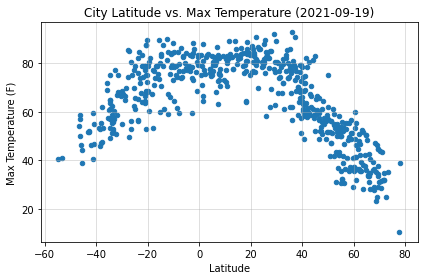

In [44]:
weather_data_df.plot.scatter(
    x = 'Lat', 
    y = 'Max Temp', 
)
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({date.today()})')
plt.tight_layout()
plt.savefig('images/lat_vs_temp.png')
plt.show()

Observation: As the latitude changes, the temperature drops.

## Latitude vs. Humidity Plot

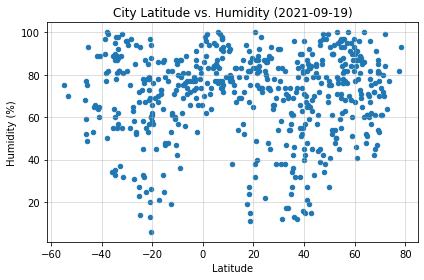

In [47]:
weather_data_df.plot.scatter(
    x = 'Lat', 
    y = 'Humidity', 
)
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date.today()})')
plt.tight_layout()
plt.savefig('images/lat_vs_humidity.png')
plt.show()

Observation: A majority of cities have humidity above 60%.

## Latitude vs. Cloudiness Plot

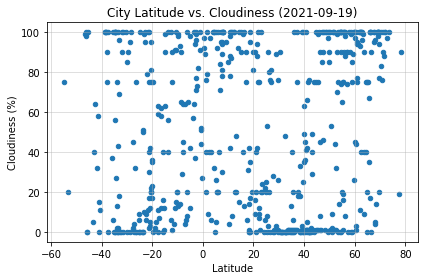

In [48]:
weather_data_df.plot.scatter(
    x = 'Lat', 
    y = 'Cloudiness', 
)
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date.today()})')
plt.tight_layout()
plt.savefig('images/lat_vs_cloudiness.png')
plt.show()

Observation: Doesn't appear to be any correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

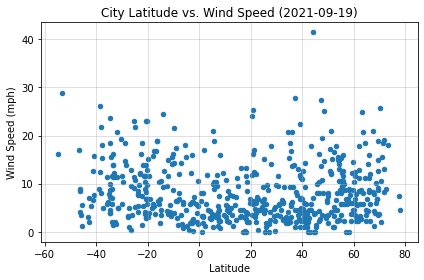

In [51]:
weather_data_df.plot.scatter(
    x = 'Lat', 
    y = 'Wind Speed', 
)
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date.today()})')
plt.tight_layout()
plt.savefig('images/lat_vs_wind.png')
plt.show()

Observation: Wind spped for most cities is below 15 mph.

## Linear Regression

In [93]:
# Make a DataFrame for each hemisphere
nhemisphere_df = weather_data_df[weather_data_df['Lat']>=0]
shemisphere_df = weather_data_df[weather_data_df['Lat']<0]

# Make a function for the linear regression because I don't wanna type this out every time
def linear_regression(x_value, y_value, x_label, y_label, filename):
    (slope, intercept, rvalue, _, _) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    print(f'The r-value is: {round(rvalue**2, 4)}')
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, 'r-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq, coord, fontsize=14, color='r')
    plt.tight_layout()
    plt.savefig(f'images/{filename}.png')
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7246


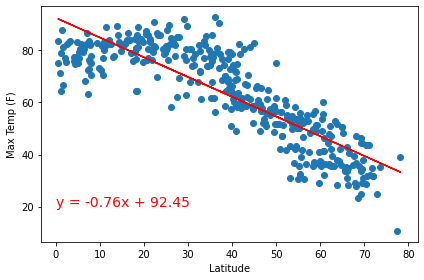

In [94]:
x_value = nhemisphere_df['Lat']
y_value = nhemisphere_df['Max Temp']
coord = (0,20)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Max Temp (F)', 
    filename='nhemisphere_temp_vs_lat'
)

Observation: The temperature drops as latitude increases suggesting is a negative correlation between latitude and temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5299


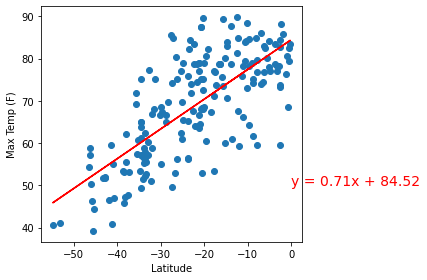

In [95]:
x_value = shemisphere_df['Lat']
y_value = shemisphere_df['Max Temp']
coord = (0,50)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Max Temp (F)', 
    filename='shemisphere_temp_vs_lat'
)

Observation: Temperatures increase as it gets to zero degrees latitude suggesting a positive correlation between latitude and temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0016


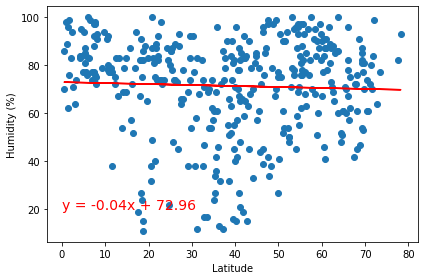

In [97]:
x_value = nhemisphere_df['Lat']
y_value = nhemisphere_df['Humidity']
coord = (0,20)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Humidity (%)', 
    filename='nhemisphere_humidity_vs_lat'
)

Observation: There is a weak correlation between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0008


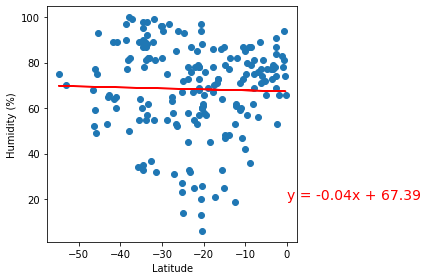

In [98]:
x_value = shemisphere_df['Lat']
y_value = shemisphere_df['Humidity']
coord = (0,20)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Humidity (%)', 
    filename='shemisphere_humidity_vs_lat'
)

Observation: There is a weak correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0157


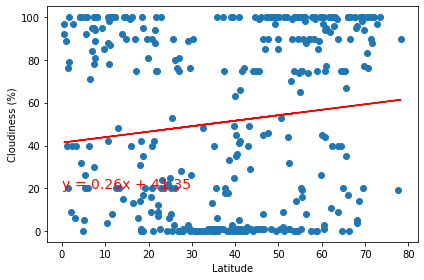

In [99]:
x_value = nhemisphere_df['Lat']
y_value = nhemisphere_df['Cloudiness']
coord = (0,20)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Cloudiness (%)', 
    filename='nhemisphere_cloudiness_vs_lat'
)

Observation: There doesn't appear to be any correlation between cloudiness and latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0023


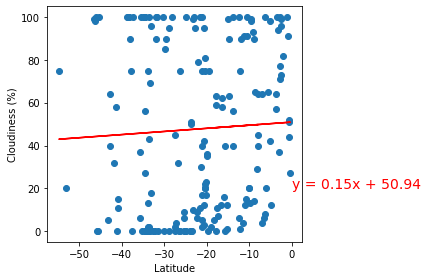

In [100]:
x_value = shemisphere_df['Lat']
y_value = shemisphere_df['Cloudiness']
coord = (0,20)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Cloudiness (%)', 
    filename='shemisphere_cloudiness_vs_lat'
)

Observation: There doesn't appear to be any correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0397


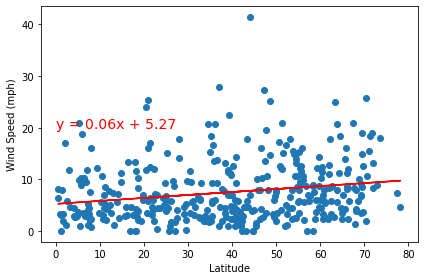

In [101]:
x_value = nhemisphere_df['Lat']
y_value = nhemisphere_df['Wind Speed']
coord = (0,20)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Wind Speed (mph)', 
    filename='nhemisphere_wind_vs_lat'
)

Observation: Overall wind speeds are between 0 and 10 mph suggesting a slight positive correlation. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0363


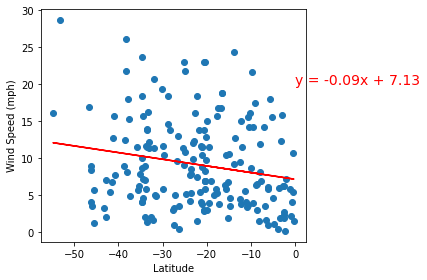

In [102]:
x_value = shemisphere_df['Lat']
y_value = shemisphere_df['Wind Speed']
coord = (0,20)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Wind Speed (mph)', 
    filename='shemisphere_wind_vs_lat'
)

Observation: Cities closer to zero degrees latitue have greater wind speeds suggesting a negative correlation. 